<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#env" data-toc-modified-id="env-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>env</a></span></li><li><span><a href="#a-sample-situation-for-initial-density-matters" data-toc-modified-id="a-sample-situation-for-initial-density-matters-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>a sample situation for initial density matters</a></span><ul class="toc-item"><li><span><a href="#data-import" data-toc-modified-id="data-import-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>data import</a></span></li><li><span><a href="#plots" data-toc-modified-id="plots-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>plots</a></span></li></ul></li><li><span><a href="#a-sample-in-initial-density-1e-5-$gC/m^3$;-py3-not-agree-with-R" data-toc-modified-id="a-sample-in-initial-density-1e-5-$gC/m^3$;-py3-not-agree-with-R-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>a sample in initial density 1e-5 $gC/m^3$; py3 not agree with R</a></span></li><li><span><a href="#when-start-at-eqm-position-for-a-random-parameter-set" data-toc-modified-id="when-start-at-eqm-position-for-a-random-parameter-set-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>when start at eqm position for a random parameter set</a></span></li></ul></div>

# env

In [1]:
include("../code/func.jl")
rAw = CSV.read("../result/maxYield_ALL.csv")
println()

In [2]:
describe(rAw)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Float64,Float64,Float64,Float64,Nothing,Nothing,DataType
1,x,0.5,0.0,0.5,1.0,,,Float64
2,e_PR,0.875,0.875,0.875,0.875,,,Float64
3,e_P,0.63,0.63,0.63,0.63,,,Float64
4,g_P,0.407555,0.259,0.4075,0.556,,,Float64
5,a_P,0.200491,0.001,0.2004,0.4,,,Float64
6,e_BR,0.6,0.6,0.6,0.6,,,Float64
7,e_B,0.55,0.55,0.55,0.55,,,Float64
8,g_B,4.85839,0.707,4.86,9.01,,,Float64
9,m_B,0.14,0.14,0.14,0.14,,,Float64


number of parameter sets failed in R integration under initial carbon densities at 1e-12

In [3]:
fAil = DataFrame(zeros(0,9))
rename!(fAil,names(rAw)[1:9])
for i in Array(CSV.read("p_tmp/filL.csv", header=false))
    push!(fAil,rAw[i,names(rAw)[1:9]])
end
size(fAil)

(33637, 9)

# a sample situation for initial density matters
## data import

number of parameter sets failed in both R & py3 integrations under initial carbon densities at 1e-12

In [4]:
fAl = CSV.read("failSit.csv")
size(fAl)

(1122, 1)

In [5]:
function ePlt(df,liSt,num,iniPop)
    eQm = Array(ebcAlt(df[liSt[num],:]))
    xx = similar(eQm)
    for i in 1:size(xx)[1]; for j in 1:size(xx)[2]
        xx[i,j] = 1000-50*(i-1)
            end;end
    a = ebcData(1000,iniPop,df[liSt[num],:])
    a0 = DataFrame(a)
    a1 = [round(Array(a0[size(a0)[1],:])[i]; digits=4) for i in 1:4]
    plot(a, ylim = [-100,maximum(eQm[4,:])*1.1], label=[i*"-num" for i in ["C" "P" "B" "A"]], legend=:top, title="Final:\nC = "*string(a1[1])*"\nP = "*string(a1[2])*"\nB = "*string(a1[3])*"\nA = "*string(a1[4]))
    scatter!(xx,eQm, label=[i*"-ana" for i in ["C" "P" "B" "A"]], m=(.5, [:star1 :star2 :star4 :star7], 5))
    #scatter!(xx,eQm, label=["eqm-"*string(i) for i in [1 2 3 4]], m=(.5, [:star1 :star2 :star4 :star7], 5))
end

ePlt (generic function with 1 method)

In [6]:
function ebcRPlt(para,iniPop)
    dAta=ebcData(1000,iniPop,para)
    rAte=DataFrame(C=Float16[],P=Float16[],B=Float16[],A=Float16[])
    for tmp in 1:size(dAta)[1]
        a = ebcRate(dAta[tmp,1:3],para)
        a = push!(a,sum(a))
        push!(rAte,a)
    end
    plot(Array(rAte),label=["C: "*string(rAte[size(rAte)[1],1]) "P: "*string(rAte[size(rAte)[1],2]) "B: "*string(rAte[size(rAte)[1],3]) "A: "*string(rAte[size(rAte)[1],4])])
end

ebcRPlt (generic function with 1 method)

## plots

In [7]:
ebcAlt(fAil[Array(fAl)[1],:])

,C,P,B,A
,Float64,Float64,Float64,Float64
1,0.0,0.0,0.0,0.0
2,0.27602,0.0,-0.569291,-0.293271
3,92.446,142.774,0.0,235.22
4,0.27602,142.774,190.101,333.15


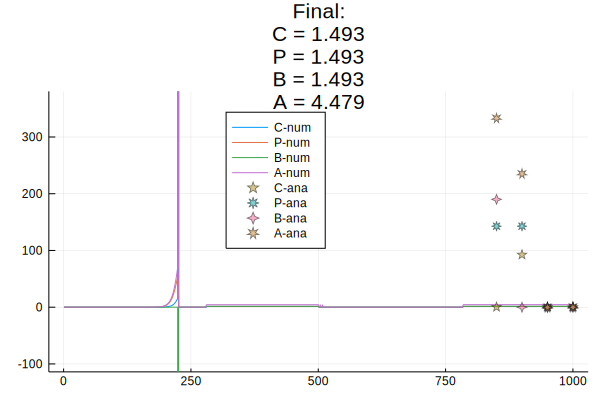

In [8]:
ePlt(fAil,Array(fAl),1,1e-12)

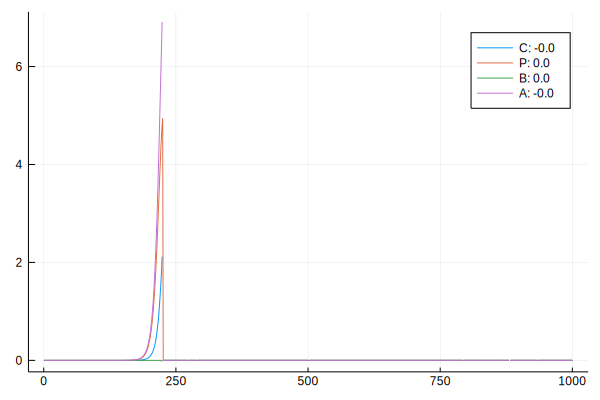

In [9]:
ebcRPlt(fAil[Array(fAl)[1],:],1e-12)

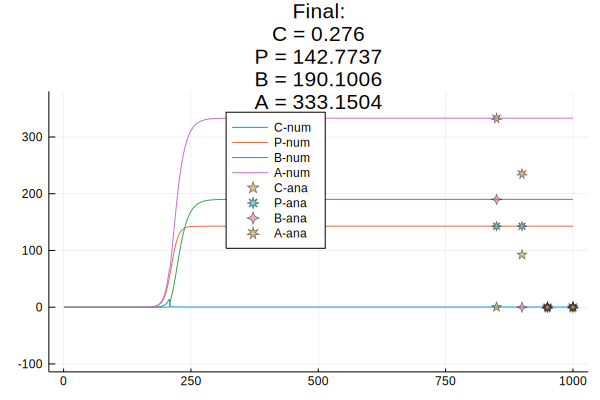

In [10]:
ePlt(fAil,Array(fAl),1,1e-11)

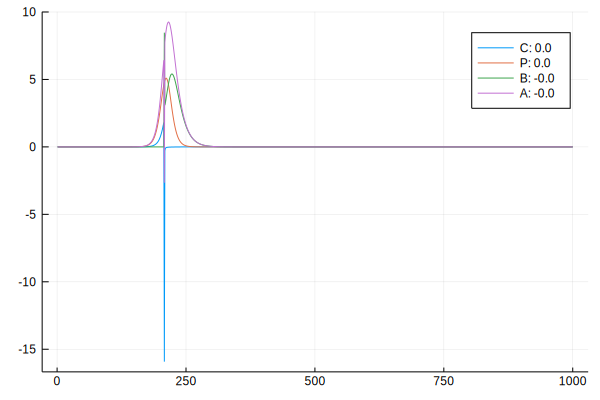

In [11]:
ebcRPlt(fAil[Array(fAl)[1],:],1e-11)

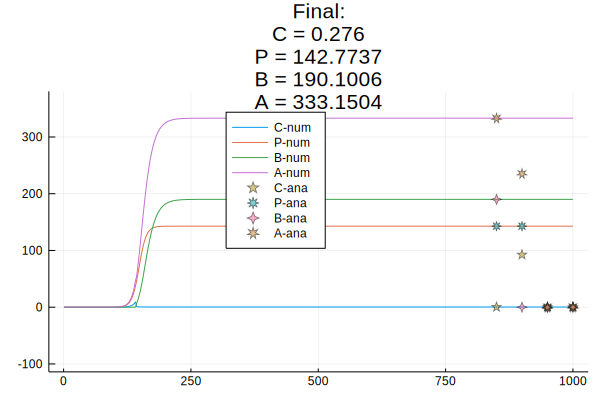

In [12]:
ePlt(fAil,Array(fAl),1,1e-07)

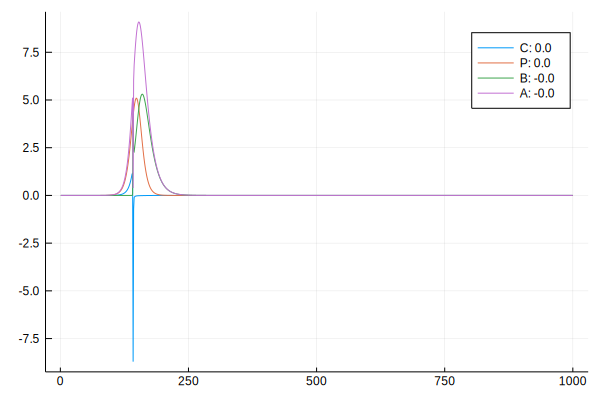

In [13]:
ebcRPlt(fAil[Array(fAl)[1],:],1e-07)

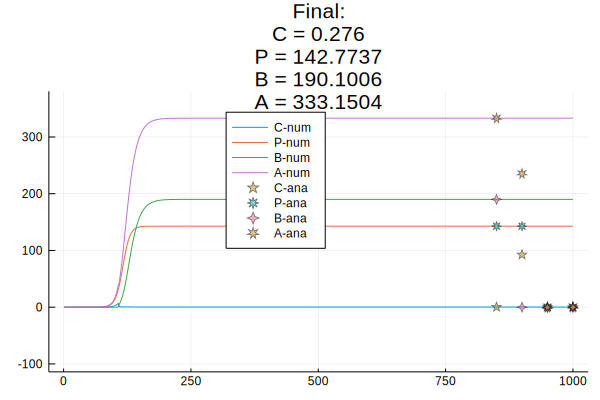

In [14]:
ePlt(fAil,Array(fAl),1,1e-05)

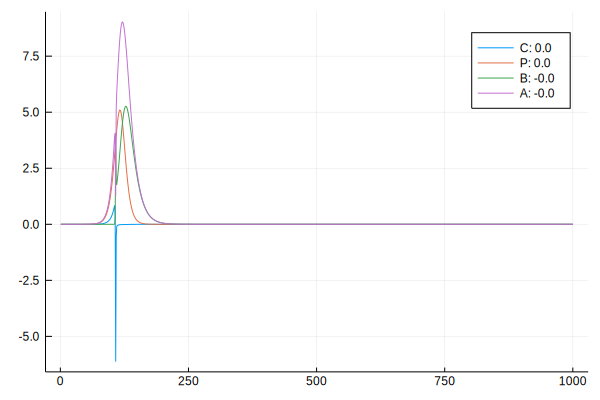

In [15]:
ebcRPlt(fAil[Array(fAl)[1],:],1e-05)

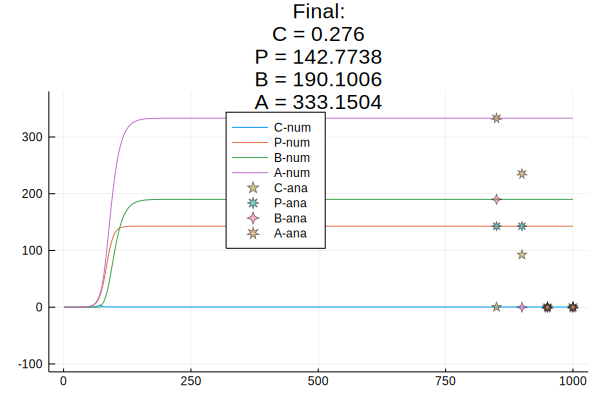

In [16]:
ePlt(fAil,Array(fAl),1,1e-03)

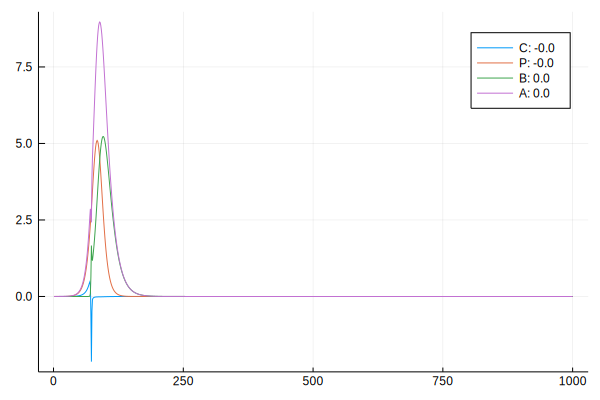

In [17]:
ebcRPlt(fAil[Array(fAl)[1],:],1e-03)

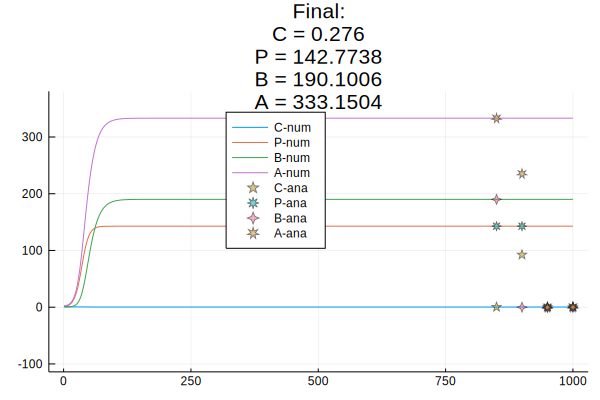

In [18]:
ePlt(fAil,Array(fAl),1,1e-00)

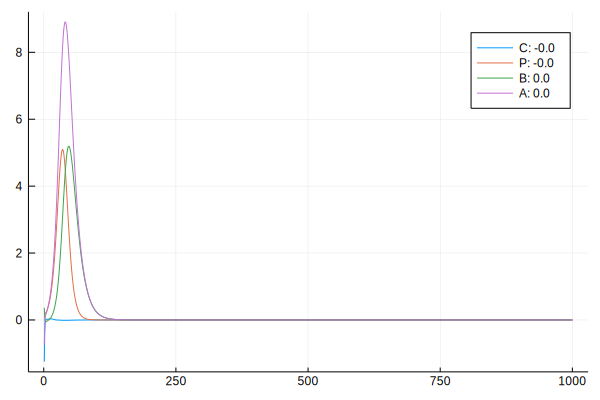

In [19]:
ebcRPlt(fAil[Array(fAl)[1],:],1e-00)

# a sample in initial density 1e-5 $gC/m^3$; py3 not agree with R

In [20]:
pp0 = [538446 672673 746107 782771 941650 978741 990429 1015299 1039422 1052073 1088415 1125187 1137300 1137516]

1×14 Array{Int64,2}:
 538446  672673  746107  782771  …  1088415  1125187  1137300  1137516

In [21]:
ebcAlt(rAw[Array(pp0)[1],:])

,C,P,B,A
,Float64,Float64,Float64,Float64
1,0.0,0.0,0.0,0.0
2,0.226989,0.0,-0.58855,-0.361561
3,0.26235,0.509361,0.0,0.77171
4,0.226989,0.509361,0.091685,0.828035


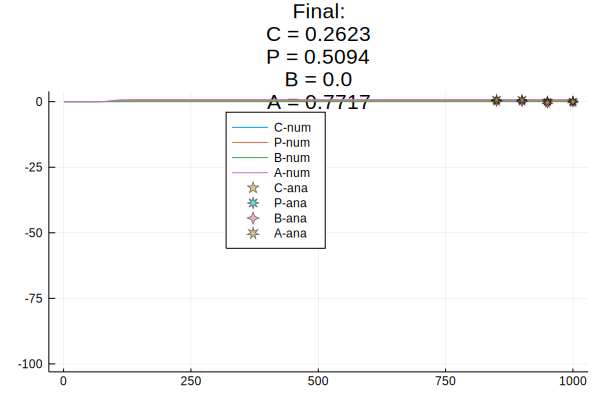

In [22]:
ePlt(rAw,pp0,1,1e-06)

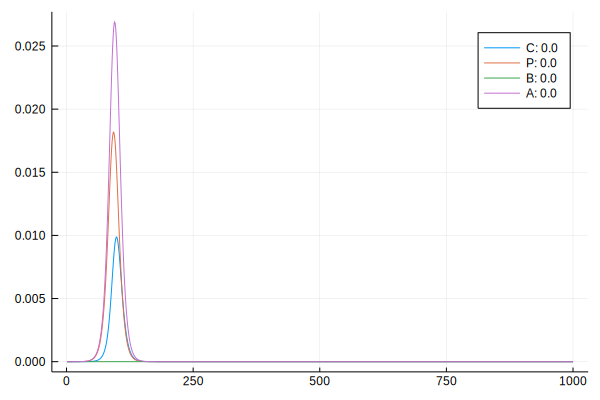

In [23]:
ebcRPlt(rAw[pp0[1],:],1e-06)

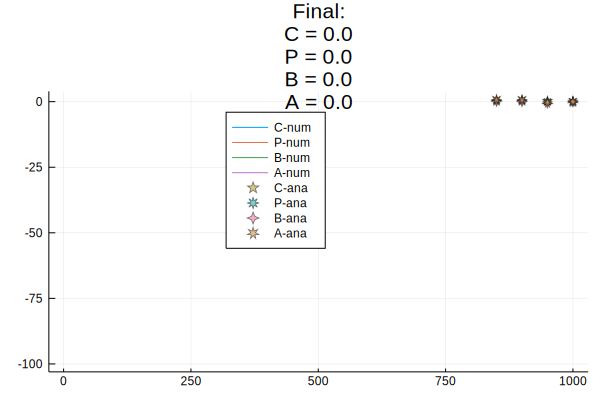

In [24]:
ePlt(rAw,pp0,1,1e-05)

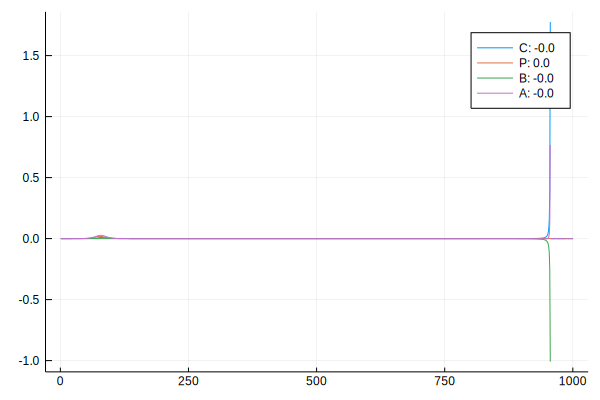

In [25]:
ebcRPlt(rAw[pp0[1],:],1e-05)

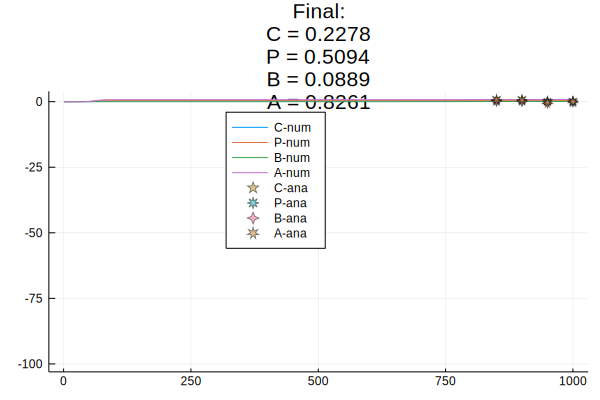

In [26]:
ePlt(rAw,pp0,1,1e-04)

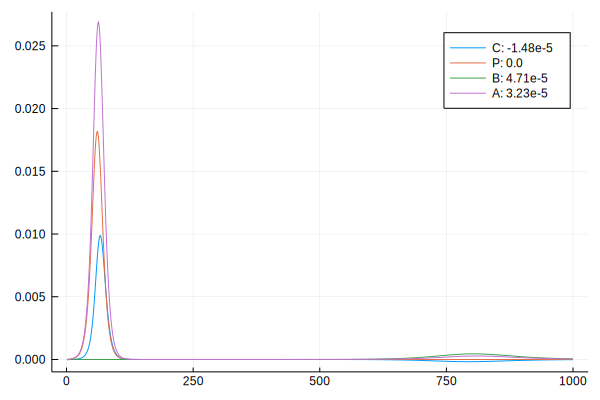

In [27]:
ebcRPlt(rAw[pp0[1],:],1e-04)

# when start at eqm position for a random parameter set

In [28]:
function ebcPlt(iniPop,para)
    dAta=ebcData(1000, iniPop,para)
    eQm = Array(ebcAlt(para))
    xx = similar(eQm)
    for i in 1:size(xx)[1]; for j in 1:size(xx)[2]
        xx[i,j] = 1000-50*(i-1)
            end;end
    plot(dAta, label=["C = "*string(round(dAta[size(dAta)[1],1],digits=4)) "P = "*string(round(dAta[size(dAta)[1],2],digits=4)) "B = "*string(round(dAta[size(dAta)[1],3],digits=4)) "A = "*string(round(dAta[size(dAta)[1],4],digits=4))], ylim = [0 maximum(eQm)*1.05], legend=:top)
    scatter!(xx,eQm, label=[i*"-ana" for i in ["C" "P" "B" "A"]], m=(.5, [:star1 :star2 :star4 :star7], 5))
end

ebcPlt (generic function with 1 method)

In [29]:
i = 102345
i0 = rAw[i,names(rAw)[1:9]]

,x,e_PR,e_P,g_P,a_P,e_BR,e_B,g_B,m_B
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
102345,0.08,0.875,0.63,0.378,0.0409,0.6,0.55,3.281,0.14


In [30]:
i2 = ebcAlt(i0)

,C,P,B,A
,Float64,Float64,Float64,Float64
1,0.0,0.0,0.0,0.0
2,0.129303,0.0,-0.060957,0.0683458
3,21.0633,5.09468,0.0,26.158
4,0.129303,5.09468,9.8689,15.0929


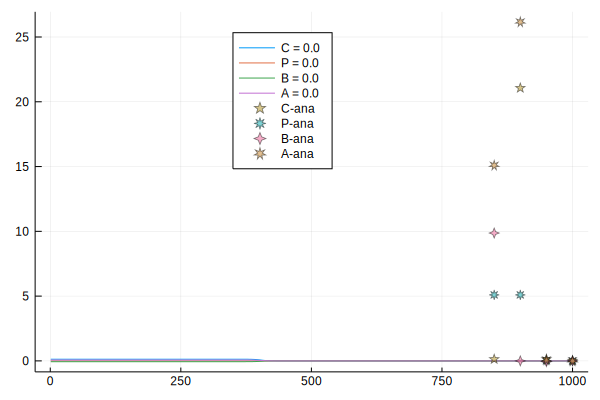

In [31]:
ebcPlt(Array(i2[2,names(i2)[1:3]]),i0)

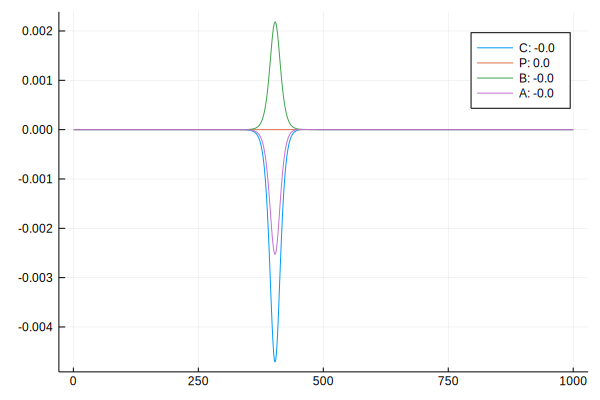

In [32]:
ebcRPlt(i0,Array(i2[2,names(i2)[1:3]]))

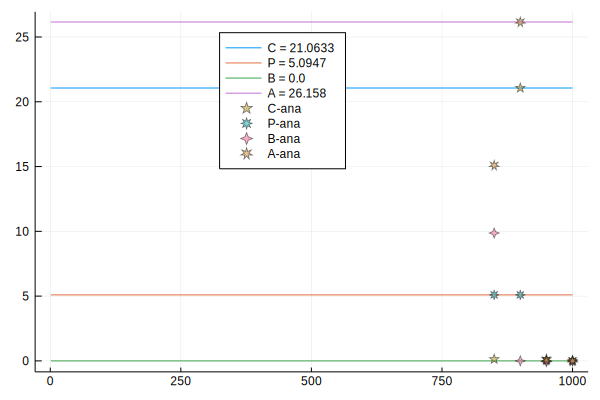

In [33]:
ebcPlt(Array(i2[3,names(i2)[1:3]]),i0)

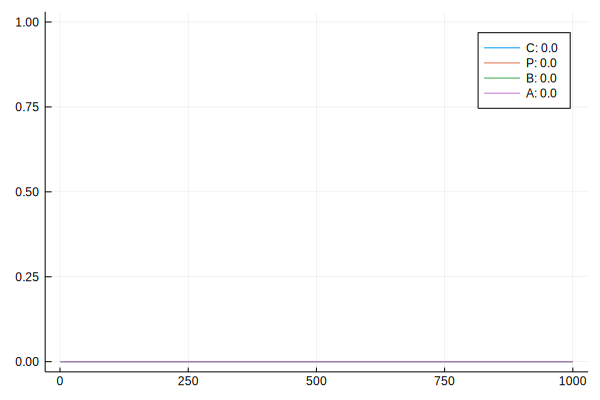

In [34]:
ebcRPlt(i0,Array(i2[3,names(i2)[1:3]]))

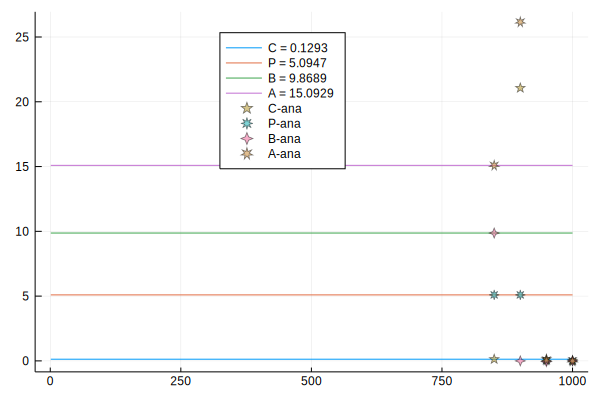

In [35]:
ebcPlt(Array(i2[4,names(i2)[1:3]]),i0)

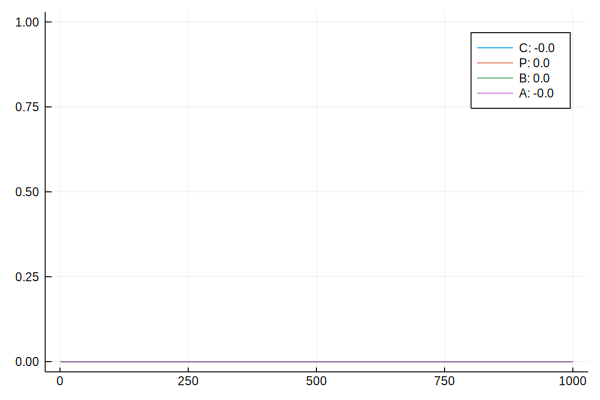

In [36]:
ebcRPlt(i0,Array(i2[4,names(i2)[1:3]]))